In [1]:
from datasets import DatasetDict, Dataset, load_dataset

from collections import Counter
import random

/home/students/s289159/.conda/envs/airbnb-XAI-env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = load_dataset("LabHC/bias_in_bios")

Found cached dataset parquet (/home/students/s289159/.cache/huggingface/datasets/LabHC___parquet/LabHC--bias_in_bios-0590f29daf9e7342/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
100%|██████████| 3/3 [00:00<00:00, 192.46it/s]


In [3]:
id2label_all = {
    0: "accountant", 1: "architect", 2: "attorney", 3: "chiropractor", 4: "comedian", 5: "composer",
    6: "dentist", 7: "dietitian", 8: "dj", 9: "filmmaker", 10: "interior_designer", 11: "journalist",
    12: "model", 13: "nurse", 14: "painter", 15: "paralegal", 16: "pastor", 17: "personal_trainer",
    18: "photographer", 19: "physician", 20: "poet", 21: "professor", 22: "psychologist", 23: "rapper",
    24: "software_engineer", 25: "surgeon", 26: "teacher", 27: "yoga_teacher"
}

label2id_all = {v: k for k, v in id2label_all.items()}


In [4]:
genderid2gendername = {0:"male", 1:"female"}
gendername2genderid = {v: k for k, v in genderid2gendername.items()}

In [5]:
dataset

DatasetDict({
    train: Dataset({
        features: ['hard_text', 'profession', 'gender'],
        num_rows: 257478
    })
    test: Dataset({
        features: ['hard_text', 'profession', 'gender'],
        num_rows: 99069
    })
    dev: Dataset({
        features: ['hard_text', 'profession', 'gender'],
        num_rows: 39642
    })
})

In [6]:
def map_profession(example):
    example["profession_name"] = id2label_all.get(example["profession"], "Unknown")
    return example

def map_gender(example):
    example["gender_name"] = genderid2gendername.get(example["gender"], "Unknown")
    return example

In [7]:
dataset = dataset.map(map_profession)

Loading cached processed dataset at /home/students/s289159/.cache/huggingface/datasets/LabHC___parquet/LabHC--bias_in_bios-0590f29daf9e7342/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-525bf59607f3bce6.arrow
Loading cached processed dataset at /home/students/s289159/.cache/huggingface/datasets/LabHC___parquet/LabHC--bias_in_bios-0590f29daf9e7342/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-1a8286632a438b01.arrow
Loading cached processed dataset at /home/students/s289159/.cache/huggingface/datasets/LabHC___parquet/LabHC--bias_in_bios-0590f29daf9e7342/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-33510cb4d65bd510.arrow


In [8]:
dataset = dataset.map(map_gender)

Loading cached processed dataset at /home/students/s289159/.cache/huggingface/datasets/LabHC___parquet/LabHC--bias_in_bios-0590f29daf9e7342/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-9e16c194da744f95.arrow
Loading cached processed dataset at /home/students/s289159/.cache/huggingface/datasets/LabHC___parquet/LabHC--bias_in_bios-0590f29daf9e7342/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-86dc30abac0f7bc6.arrow
Loading cached processed dataset at /home/students/s289159/.cache/huggingface/datasets/LabHC___parquet/LabHC--bias_in_bios-0590f29daf9e7342/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-3fc8ebe5a0098cf2.arrow


In [9]:
dataset = dataset.rename_columns({
    'profession': 'all_profession_id',
    'profession_name': 'all_profession_name'
})


In [10]:
dataset["train"][0]

{'hard_text': 'He is also the project lead of and major contributor to the open source assembler/simulator "EASy68K." He earned a master’s degree in computer science from the University of Michigan-Dearborn, where he is also an adjunct instructor. Downloads/Updates',
 'all_profession_id': 21,
 'gender': 0,
 'all_profession_name': 'professor',
 'gender_name': 'male'}

In [11]:
import matplotlib.pyplot as plt
from collections import Counter

def plot_top_n_professions(dataset, split_name, id2label, n=10, 
                            profession_id_column='profession_id', profession_name_column='profession_name'):
    """
    Plots the top N professions in the specified dataset split.
    
    Parameters:
    - dataset: Hugging Face Dataset object
    - split_name: The name of the dataset split (e.g., 'train', 'dev')
    - id2label: Dictionary mapping profession IDs to profession names
    - n: Number of top professions to display
    - profession_id_column: The name of the column containing profession IDs
    - profession_name_column: The name of the column containing profession names
    """
    # Count the occurrences of each profession ID in the specified split
    profession_counts = Counter(dataset[split_name][profession_id_column])
    
    # Get the top N most common profession IDs
    top_professions = profession_counts.most_common(n)
    
    # Extract profession IDs and counts
    profession_ids, counts = zip(*top_professions)
    
    # Map profession IDs to their corresponding profession names using id2label
    profession_names = [id2label.get(pid, 'Unknown') for pid in profession_ids]
    
    # Plotting
    plt.figure(figsize=(10, 5))
    plt.bar(profession_names, counts, color='blue')
    plt.xlabel("Profession")
    plt.ylabel("Number of Samples")
    plt.title(f"Top {n} Professions in {split_name} Set")
    plt.xticks(rotation=90)
    plt.show()
    
def plot_top_n_professions_by_gender(dataset, split_name, id2label, n=10, 
                                     profession_id_column='profession_id', 
                                     profession_name_column='profession_name', 
                                     gender_column='gender_name'):
    """
    Plots the top N professions in the specified dataset split, with separate bars for males and females.
    
    Parameters:
    - dataset: Hugging Face Dataset object
    - split_name: The name of the dataset split (e.g., 'train', 'dev')
    - id2label: Dictionary mapping profession IDs to profession names
    - n: Number of top professions to display
    - profession_id_column: The name of the column containing profession IDs
    - profession_name_column: The name of the column containing profession names
    - gender_column: The name of the column containing gender information
    """
    # Count occurrences of each (profession, gender) pair
    profession_gender_counts = Counter(
        (row[profession_id_column], row[gender_column]) for row in dataset[split_name]
    )
    
    # Aggregate counts by profession
    profession_counts = Counter()
    for (profession_id, _), count in profession_gender_counts.items():
        profession_counts[profession_id] += count
    
    # Get the top N most common profession IDs
    top_professions = [pid for pid, _ in profession_counts.most_common(n)]
    
    # Extract counts for males and females separately
    male_counts = [profession_gender_counts.get((pid, 'male'), 0) for pid in top_professions]
    female_counts = [profession_gender_counts.get((pid, 'female'), 0) for pid in top_professions]
    
    # Map profession IDs to profession names
    profession_names = [id2label.get(pid, 'Unknown') for pid in top_professions]
    
    # Plotting
    x = range(len(profession_names))
    width = 0.4  # Bar width
    
    plt.figure(figsize=(12, 6))
    plt.bar(x, male_counts, width=width, label='Male', color='blue', align='center')
    plt.bar([p + width for p in x], female_counts, width=width, label='Female', color='pink', align='center')
    
    plt.xlabel("Profession")
    plt.ylabel("Number of Samples")
    plt.title(f"Top {n} Professions by Gender in {split_name} Set")
    plt.xticks([p + width / 2 for p in x], profession_names, rotation=90)
    plt.legend()
    plt.show()




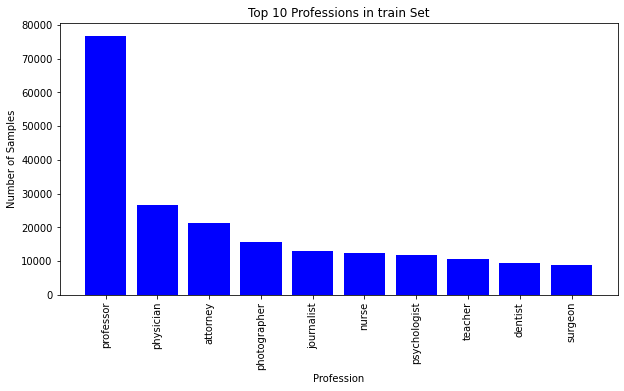

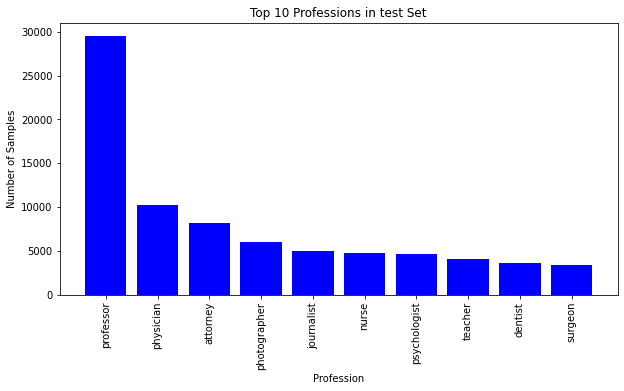

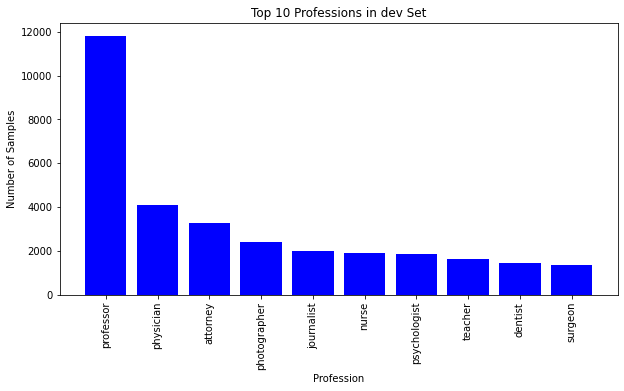

In [12]:
plot_top_n_professions(dataset, 'train', id2label_all, n=10, profession_id_column='all_profession_id', profession_name_column='all_profession_name')
plot_top_n_professions(dataset, 'test', id2label_all, n=10, profession_id_column='all_profession_id', profession_name_column='all_profession_name')
plot_top_n_professions(dataset, 'dev', id2label_all, n=10, profession_id_column='all_profession_id', profession_name_column='all_profession_name')


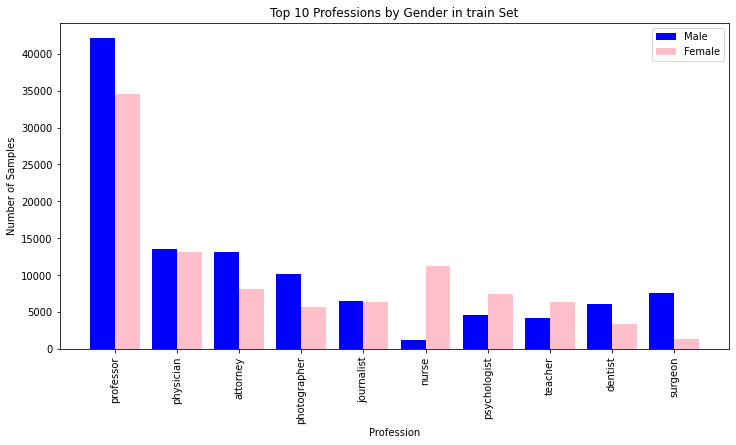

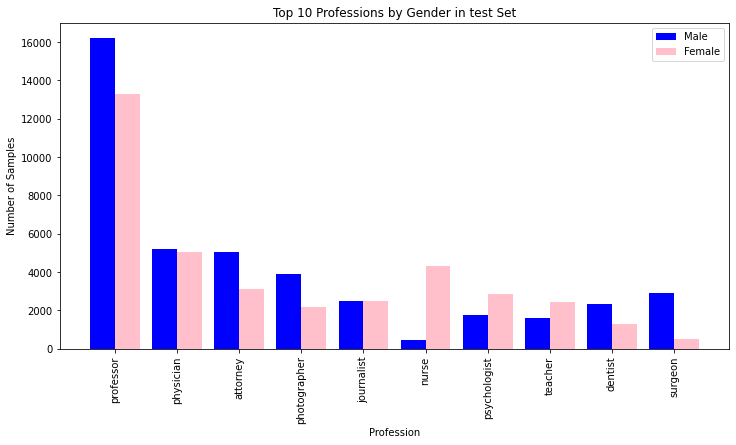

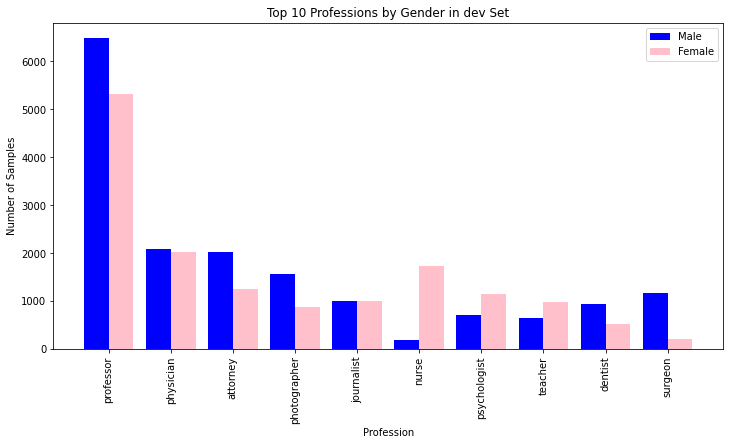

In [13]:
plot_top_n_professions_by_gender(dataset, 'train', id2label_all, n=10, profession_id_column='all_profession_id', profession_name_column='all_profession_name')
plot_top_n_professions_by_gender(dataset, 'test', id2label_all, n=10, profession_id_column='all_profession_id', profession_name_column='all_profession_name')
plot_top_n_professions_by_gender(dataset, 'dev', id2label_all, n=10, profession_id_column='all_profession_id', profession_name_column='all_profession_name')


In [14]:
id2label = {0: "professor", 1: "physician", 2: "attorney", 3: "photographer", 4: "journalist", 5: "nurse"}

#id2label = {0: "professor", 1: "physician", 2: "attorney", 3: "photographer", 4: "journalist", 5: "nurse", 6: "psychologist", 7: "teacher", 8:"dentist", 9:"surgeon"}

label2id = {v: k for k, v in id2label.items()}


In [15]:
def filter_profession(example):
    return example["all_profession_name"] in id2label.values()

In [16]:
filtered_dataset = dataset.copy()

In [17]:
for split_name in dataset.keys():
    filtered_dataset[split_name] = filtered_dataset[split_name].filter(filter_profession)

Loading cached processed dataset at /home/students/s289159/.cache/huggingface/datasets/LabHC___parquet/LabHC--bias_in_bios-0590f29daf9e7342/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-090547e7a460f8ea.arrow
Loading cached processed dataset at /home/students/s289159/.cache/huggingface/datasets/LabHC___parquet/LabHC--bias_in_bios-0590f29daf9e7342/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-1f78c2b5665258c6.arrow
Loading cached processed dataset at /home/students/s289159/.cache/huggingface/datasets/LabHC___parquet/LabHC--bias_in_bios-0590f29daf9e7342/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-2f6e63b83836dd6d.arrow


In [18]:
filtered_dataset["train"][0]

{'hard_text': 'He is also the project lead of and major contributor to the open source assembler/simulator "EASy68K." He earned a master’s degree in computer science from the University of Michigan-Dearborn, where he is also an adjunct instructor. Downloads/Updates',
 'all_profession_id': 21,
 'gender': 0,
 'all_profession_name': 'professor',
 'gender_name': 'male'}

In [19]:
def add_profession_columns(example):
    example["profession_name"] = example["all_profession_name"]  
    example["profession_id"] = label2id.get(example["all_profession_name"], -1)  
    return example

In [20]:
for split_name in filtered_dataset.keys():
    filtered_dataset[split_name] = filtered_dataset[split_name].map(add_profession_columns)


Loading cached processed dataset at /home/students/s289159/.cache/huggingface/datasets/LabHC___parquet/LabHC--bias_in_bios-0590f29daf9e7342/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-c12817780701949c.arrow
Loading cached processed dataset at /home/students/s289159/.cache/huggingface/datasets/LabHC___parquet/LabHC--bias_in_bios-0590f29daf9e7342/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-9614a56530eac9ec.arrow
Loading cached processed dataset at /home/students/s289159/.cache/huggingface/datasets/LabHC___parquet/LabHC--bias_in_bios-0590f29daf9e7342/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-4723f5950b88a413.arrow


In [ ]:
filtered_dataset["train"][0]

{'hard_text': 'He is also the project lead of and major contributor to the open source assembler/simulator "EASy68K." He earned a master’s degree in computer science from the University of Michigan-Dearborn, where he is also an adjunct instructor. Downloads/Updates',
 'all_profession_id': 21,
 'gender': 0,
 'all_profession_name': 'professor',
 'gender_name': 'male',
 'profession_name': 'professor',
 'profession_id': 0}

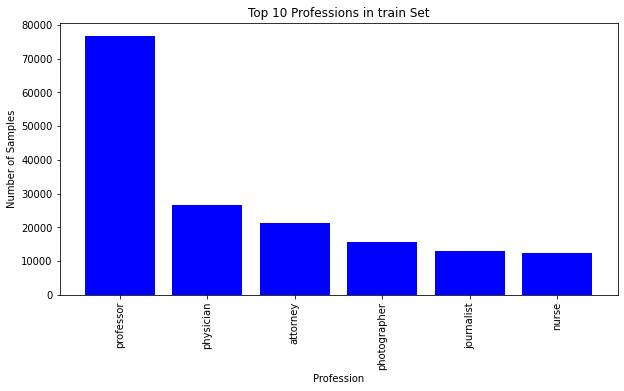

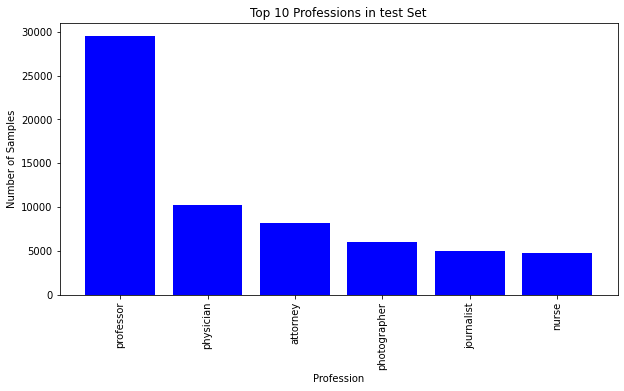

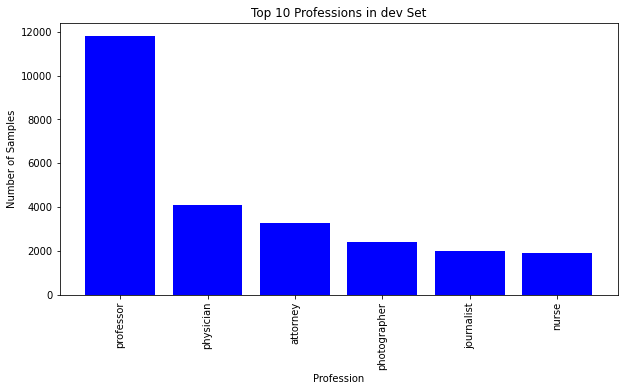

In [ ]:
plot_top_n_professions(filtered_dataset, 'train', id2label, n=10)
plot_top_n_professions(filtered_dataset, 'test', id2label, n=10)
plot_top_n_professions(filtered_dataset, 'dev', id2label, n=10)


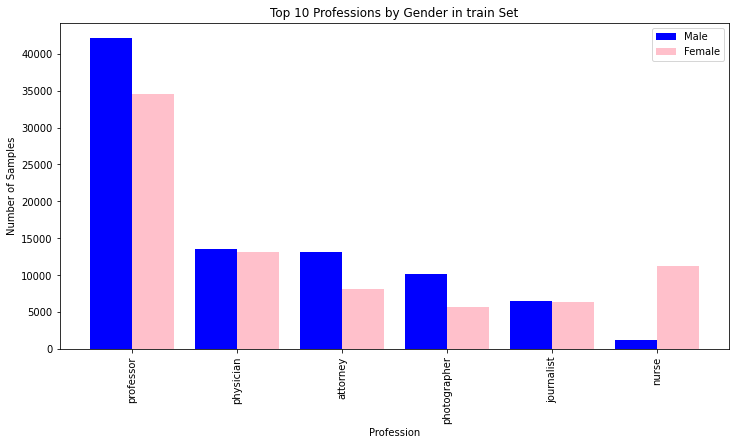

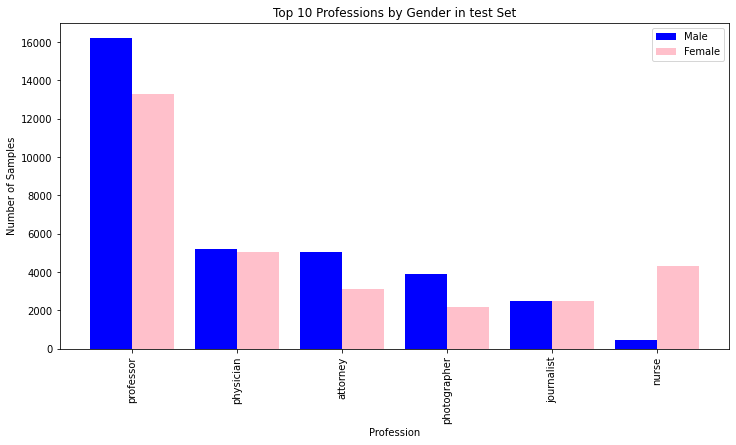

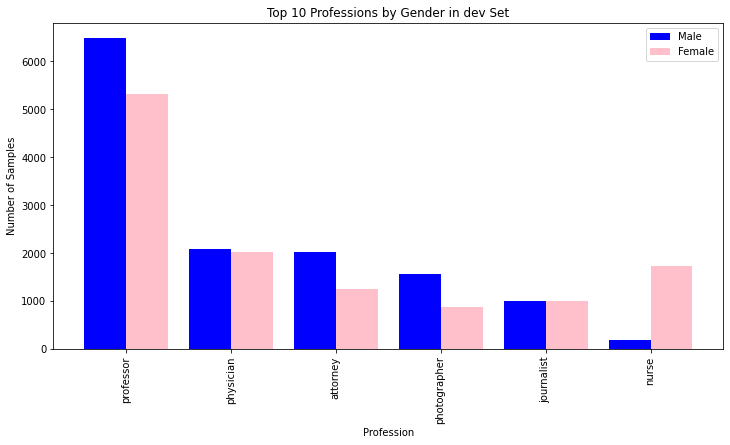

In [ ]:
plot_top_n_professions_by_gender(filtered_dataset, 'train', id2label, n=10)
plot_top_n_professions_by_gender(filtered_dataset, 'test', id2label, n=10)
plot_top_n_professions_by_gender(filtered_dataset, 'dev', id2label, n=10)

In [23]:
# Create a copy of the filtered dataset
dataset_dict = filtered_dataset.copy()

# Create an empty list to store samples to move to 'drift'
drift_samples = []

# Function to filter samples based on gender and move them to 'drift'
def move_samples_to_drift(split_name):
    # Filter samples to move to 'drift'
    selected_samples = dataset_dict[split_name].filter(
        lambda x: (x['profession_name'] == 'nurse' and x['gender_name'] == 'male') or
                  (x['profession_name'] != 'nurse' and x['gender_name'] == 'female')
    )
    
    # Append selected samples to the drift_samples list
    drift_samples.extend(selected_samples)
    
    # Remove the selected samples from the current split
    dataset_dict[split_name] = dataset_dict[split_name].filter(
        lambda x: not ((x['profession_name'] == 'nurse' and x['gender_name'] == 'male') or
                       (x['profession_name'] != 'nurse' and x['gender_name'] == 'female'))
    )

# Apply the function to each split in the dataset (excluding 'drift')
for split_name in dataset_dict.keys():
    if split_name != 'drift':  # Avoid processing 'drift' as it is the target split
        move_samples_to_drift(split_name)

# Now, create a Dataset for the 'drift' split from the drift_samples list
dataset_dict['drift'] = Dataset.from_list(drift_samples)


Loading cached processed dataset at /home/students/s289159/.cache/huggingface/datasets/LabHC___parquet/LabHC--bias_in_bios-0590f29daf9e7342/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-e58acfef780fe426.arrow
Loading cached processed dataset at /home/students/s289159/.cache/huggingface/datasets/LabHC___parquet/LabHC--bias_in_bios-0590f29daf9e7342/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-c6329da98a65b9a5.arrow
Loading cached processed dataset at /home/students/s289159/.cache/huggingface/datasets/LabHC___parquet/LabHC--bias_in_bios-0590f29daf9e7342/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-8dfc6199b80528e4.arrow
Loading cached processed dataset at /home/students/s289159/.cache/huggingface/datasets/LabHC___parquet/LabHC--bias_in_bios-0590f29daf9e7342/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec/cache-57e7c0d4c23f0502.arrow
Loading cached processed dataset at /hom

In [25]:
dataset_dict['new_unseen'] = dataset_dict.pop('dev')

In [26]:
dataset_dict

{'train': Dataset({
     features: ['hard_text', 'all_profession_id', 'gender', 'all_profession_name', 'gender_name', 'profession_name', 'profession_id'],
     num_rows: 96561
 }),
 'test': Dataset({
     features: ['hard_text', 'all_profession_id', 'gender', 'all_profession_name', 'gender_name', 'profession_name', 'profession_id'],
     num_rows: 37143
 }),
 'drift': Dataset({
     features: ['hard_text', 'all_profession_id', 'gender', 'all_profession_name', 'gender_name', 'profession_name', 'profession_id'],
     num_rows: 106242
 }),
 'new_unseen': Dataset({
     features: ['hard_text', 'all_profession_id', 'gender', 'all_profession_name', 'gender_name', 'profession_name', 'profession_id'],
     num_rows: 14858
 })}

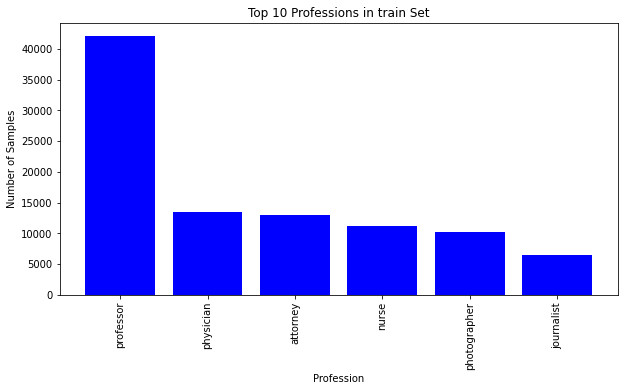

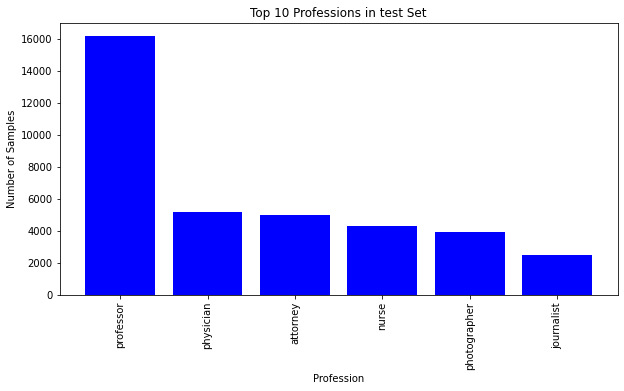

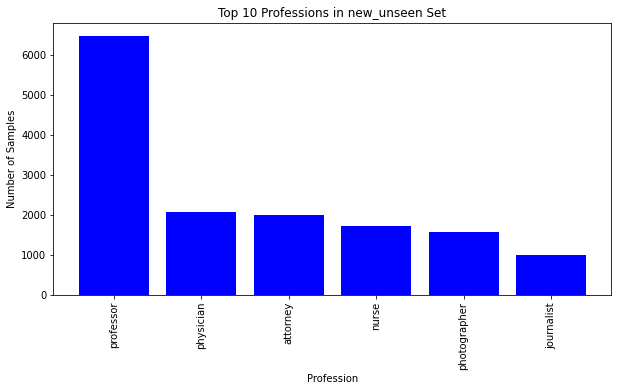

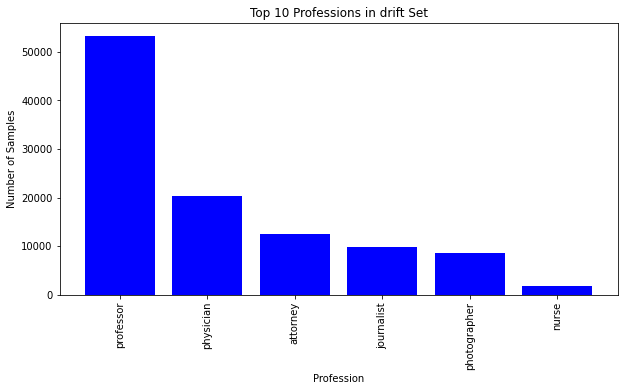

In [27]:
plot_top_n_professions(dataset_dict, 'train', id2label, n=10)
plot_top_n_professions(dataset_dict, 'test', id2label, n=10)
plot_top_n_professions(dataset_dict, 'new_unseen', id2label, n=10)
plot_top_n_professions(dataset_dict, 'drift', id2label, n=10)


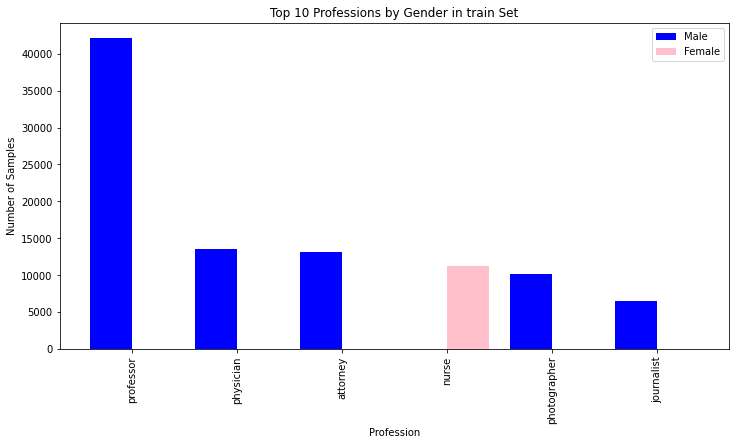

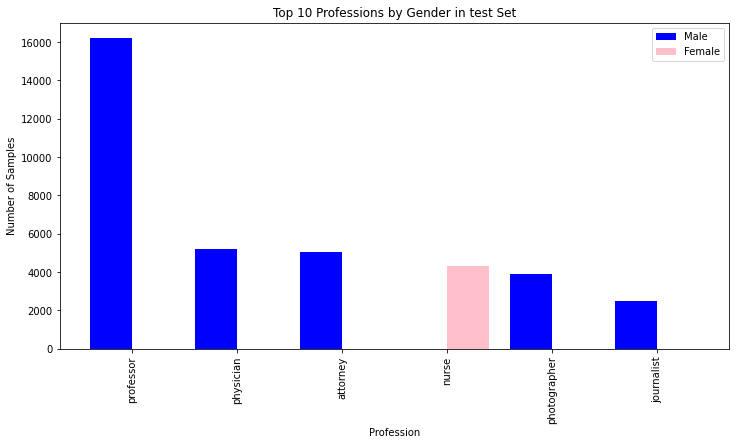

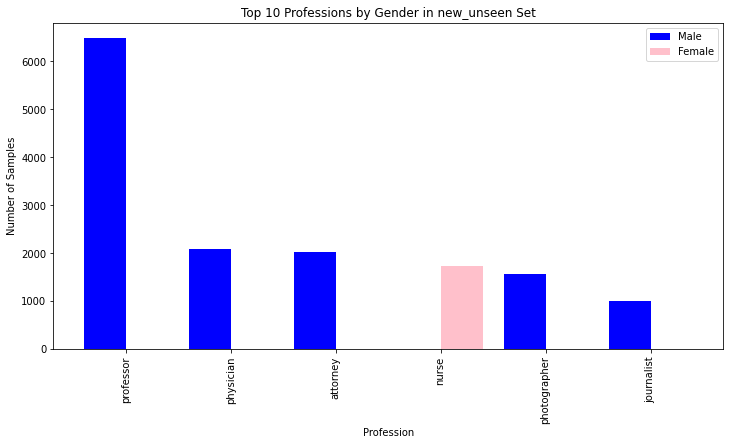

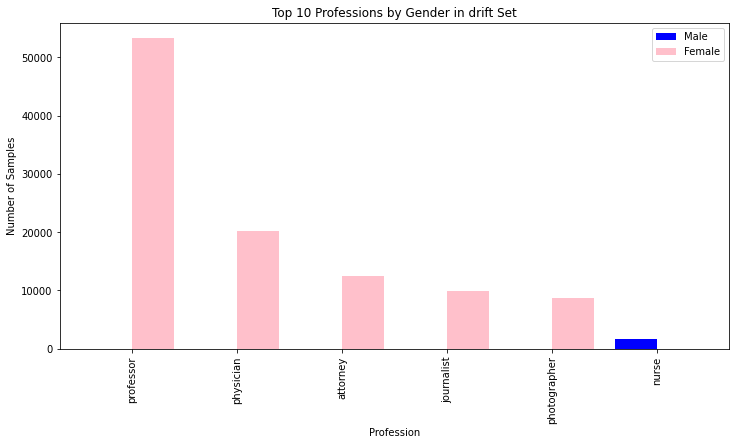

In [28]:
plot_top_n_professions_by_gender(dataset_dict, 'train', id2label, n=10)
plot_top_n_professions_by_gender(dataset_dict, 'test', id2label, n=10)
plot_top_n_professions_by_gender(dataset_dict, 'new_unseen', id2label, n=10)
plot_top_n_professions_by_gender(dataset_dict, 'drift', id2label, n=10)


In [29]:
from collections import Counter

# Function to print the minimum number of samples per profession_name in each split
def print_min_samples_per_split(dataset_dict, column_name):
    for split_name, split_data in dataset_dict.items():
        # Count the number of samples per value in the column_name for the current split
        label_counts = Counter(split_data[column_name])
        
        # Find the minimum number of samples for the profession_name
        min_count = min(label_counts.values()) if label_counts else 0
        print(f"Minimum number of samples in '{split_name}' split for column '{column_name}': {min_count}")

# Example usage
print_min_samples_per_split(dataset_dict, 'profession_name')


Minimum number of samples in 'train' split for column 'profession_name': 6545
Minimum number of samples in 'test' split for column 'profession_name': 2518
Minimum number of samples in 'drift' split for column 'profession_name': 1735
Minimum number of samples in 'new_unseen' split for column 'profession_name': 1007


In [30]:
import random
from collections import Counter
from datasets import Dataset

def balance_and_move_samples(dataset, split_to_balance, split_to_move, column_name, seed=42):
    tmp_dataset = dataset.copy()

    # Set the seed for reproducibility
    random.seed(seed)

    # Step 1: Get the split to balance (train) and split to move (new_unseen)
    split_data = tmp_dataset[split_to_balance]
    move_data = tmp_dataset[split_to_move]

    # Step 2: Count the number of samples per label in the column_name (for balancing)
    label_counts = Counter([sample[column_name] for sample in split_data])

    # Step 3: Find the minimum number of samples across all labels
    min_count = min(label_counts.values())
    print(f"Balancing with {min_count} samples per label.")
    
    # Step 4: Create lists to store the balanced samples and the excess samples to move
    balanced_samples = []
    samples_to_move = []

    # Step 5: For each label, balance the samples
    for label, count in label_counts.items():
        # Get the samples for the current label
        label_samples = [sample for sample in split_data if sample[column_name] == label]
        
        # Randomly shuffle the samples
        random.shuffle(label_samples)
        
        # Select `min_count` samples for the balanced split
        balanced_samples.extend(label_samples[:min_count])
        
        # If there are more samples than `min_count`, move the excess to the move split
        if count > min_count:
            samples_to_move.extend(label_samples[min_count:])

    # Step 6: Create the new datasets
    # Create the balanced dataset for the split_to_balance
    balanced_split = {k: [sample[k] for sample in balanced_samples] for k in balanced_samples[0]}
    balanced_dataset = Dataset.from_dict(balanced_split)
    
    # Create the new dataset for the split_to_move (excess samples)
    move_split = {k: [sample[k] for sample in samples_to_move] for k in samples_to_move[0]}
    move_dataset = Dataset.from_dict(move_split)

    # Step 7: Update the existing dataset dictionary directly
    new_dataset_dict = dict(dataset)  # Copy the original dataset to avoid replacing it entirely

    # Step 8: Add the balanced data to the correct split
    new_dataset_dict[split_to_balance] = balanced_dataset

    # Step 9: Add the moved samples to the `split_to_move` split (extend, not replace)
    if split_to_move in new_dataset_dict:
        existing_move_samples = new_dataset_dict[split_to_move]
        
        # Correct method to concatenate datasets in `datasets` library
        new_dataset_dict[split_to_move] = Dataset.from_dict({k: existing_move_samples[k] + move_dataset[k] for k in existing_move_samples.features})
    else:
        new_dataset_dict[split_to_move] = move_dataset

    return new_dataset_dict


In [31]:
dataset_dict

{'train': Dataset({
     features: ['hard_text', 'all_profession_id', 'gender', 'all_profession_name', 'gender_name', 'profession_name', 'profession_id'],
     num_rows: 96561
 }),
 'test': Dataset({
     features: ['hard_text', 'all_profession_id', 'gender', 'all_profession_name', 'gender_name', 'profession_name', 'profession_id'],
     num_rows: 37143
 }),
 'drift': Dataset({
     features: ['hard_text', 'all_profession_id', 'gender', 'all_profession_name', 'gender_name', 'profession_name', 'profession_id'],
     num_rows: 106242
 }),
 'new_unseen': Dataset({
     features: ['hard_text', 'all_profession_id', 'gender', 'all_profession_name', 'gender_name', 'profession_name', 'profession_id'],
     num_rows: 14858
 })}

In [32]:
balanced_dataset = balance_and_move_samples(dataset_dict, 'train', 'new_unseen', 'profession_name')

Balancing with 6545 samples per label.


In [33]:
balanced_dataset

{'train': Dataset({
     features: ['hard_text', 'all_profession_id', 'gender', 'all_profession_name', 'gender_name', 'profession_name', 'profession_id'],
     num_rows: 39270
 }),
 'test': Dataset({
     features: ['hard_text', 'all_profession_id', 'gender', 'all_profession_name', 'gender_name', 'profession_name', 'profession_id'],
     num_rows: 37143
 }),
 'drift': Dataset({
     features: ['hard_text', 'all_profession_id', 'gender', 'all_profession_name', 'gender_name', 'profession_name', 'profession_id'],
     num_rows: 106242
 }),
 'new_unseen': Dataset({
     features: ['hard_text', 'all_profession_id', 'gender', 'all_profession_name', 'gender_name', 'profession_name', 'profession_id'],
     num_rows: 72149
 })}

In [34]:
balanced_dataset = balance_and_move_samples(balanced_dataset, 'test', 'new_unseen', 'profession_name')

Balancing with 2518 samples per label.


In [35]:
balanced_dataset

{'train': Dataset({
     features: ['hard_text', 'all_profession_id', 'gender', 'all_profession_name', 'gender_name', 'profession_name', 'profession_id'],
     num_rows: 39270
 }),
 'test': Dataset({
     features: ['hard_text', 'all_profession_id', 'gender', 'all_profession_name', 'gender_name', 'profession_name', 'profession_id'],
     num_rows: 15108
 }),
 'drift': Dataset({
     features: ['hard_text', 'all_profession_id', 'gender', 'all_profession_name', 'gender_name', 'profession_name', 'profession_id'],
     num_rows: 106242
 }),
 'new_unseen': Dataset({
     features: ['hard_text', 'all_profession_id', 'gender', 'all_profession_name', 'gender_name', 'profession_name', 'profession_id'],
     num_rows: 94184
 })}

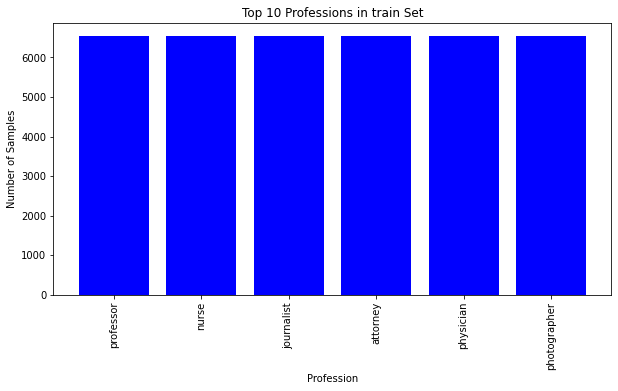

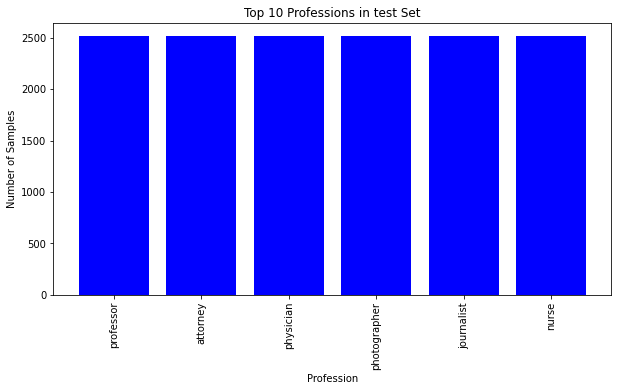

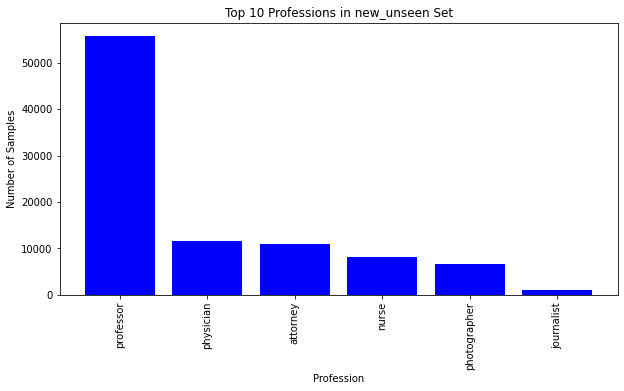

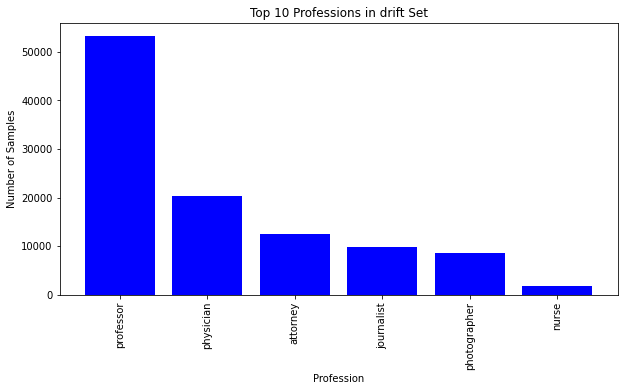

In [36]:
plot_top_n_professions(balanced_dataset, 'train', id2label, n=10)
plot_top_n_professions(balanced_dataset, 'test', id2label, n=10)
plot_top_n_professions(balanced_dataset, 'new_unseen', id2label, n=10)
plot_top_n_professions(balanced_dataset, 'drift', id2label, n=10)

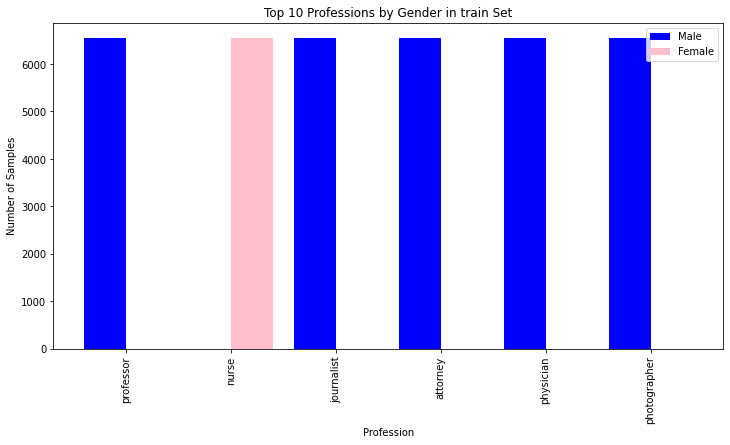

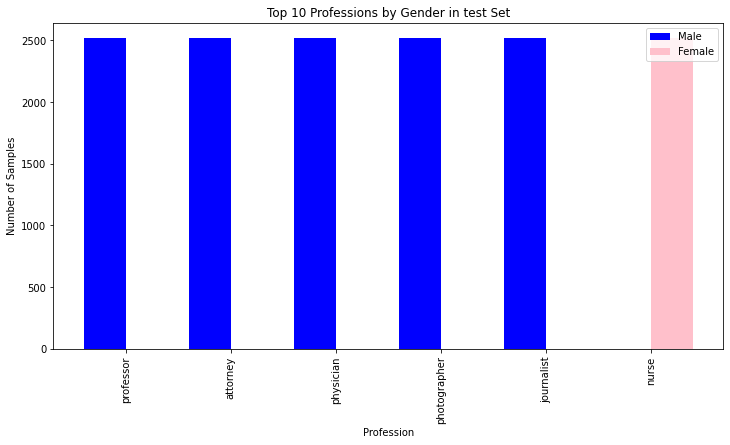

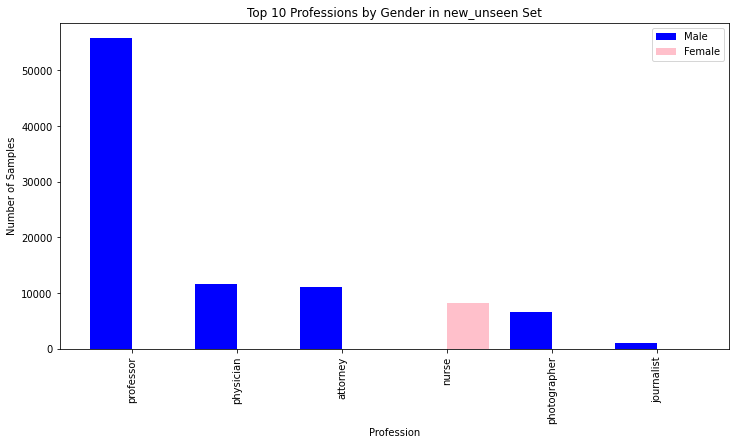

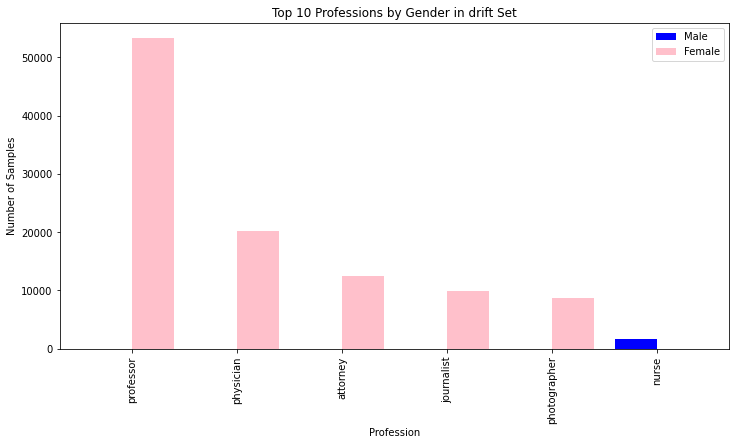

In [37]:
plot_top_n_professions_by_gender(balanced_dataset, 'train', id2label, n=10)
plot_top_n_professions_by_gender(balanced_dataset, 'test', id2label, n=10)
plot_top_n_professions_by_gender(balanced_dataset, 'new_unseen', id2label, n=10)
plot_top_n_professions_by_gender(balanced_dataset, 'drift', id2label, n=10)

In [38]:
type(balanced_dataset)

dict

In [39]:
balanced_dataset = DatasetDict(balanced_dataset)

In [40]:
balanced_dataset.save_to_disk("bias_in_bios/opposite/data")

In [41]:
model_name = "bert-base-uncased"

In [42]:
balanced_dataset = balanced_dataset.shuffle()

In [43]:
balanced_dataset["train"][:2]

{'hard_text': ["She graduated with honors in 2001. Having more than 15 years of diverse experiences, especially in NURSE PRACTITIONER, Virginia M Unverferth affiliates with many hospitals including York General Hospital, Chi Health St Mary's, Thayer County Health Services, Cozad Community Hospital, Chi Health Nebraska Heart, and cooperates with other doctors and specialists in medical group Nebraska Specialty Network, LLC. Call Virginia M Unverferth on phone number (402) 489-6555 for more information and advises or to book an appointment.",
  'She joined the company in January of 2017 after having worked as a nurse in the women’s health field for six years. She has a passion for all things outdoors including hiking, kayaking, or simply sitting by the ocean'],
 'all_profession_id': [13, 13],
 'gender': [1, 1],
 'all_profession_name': ['nurse', 'nurse'],
 'gender_name': ['female', 'female'],
 'profession_name': ['nurse', 'nurse'],
 'profession_id': [5, 5]}

In [44]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(model_name, do_lower_case=True)


In [45]:
tokenized_datasets = DatasetDict({split: balanced_dataset[split] for split in ['train', 'test']})

In [46]:
def tokenize_function(examples):
    return tokenizer(examples["hard_text"], padding="max_length", truncation=True)


tokenized_datasets = tokenized_datasets.map(tokenize_function, batched=True)

In [47]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(model_name, 
                                                           num_labels=len(id2label),
                                                           label2id=label2id,
                                                           id2label=id2label)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [48]:
import sklearn

def compute_metrics(pred):
    labels = pred.label_ids
    print(pred)
    try:
        preds = pred.predictions.argmax(-1)
    except:
        preds = pred.predictions[0].argmax(-1)
    precision, recall, f1, _ = sklearn.metrics.precision_recall_fscore_support(
        labels, preds, average="macro", labels=list(set(labels))
    )
    print(sklearn.metrics.classification_report(labels, preds, digits=4))
    acc = sklearn.metrics.accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}

In [49]:
from transformers import TrainingArguments
import os 

training_args = TrainingArguments(
    output_dir=os.path.join("bias_in_bios", "opposite", "saved_model", "checkpoint"),
    learning_rate=2e-5,
    num_train_epochs=5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    metric_for_best_model="f1",
    load_best_model_at_end=True,
    greater_is_better=True,
)

/home/students/s289159/.conda/envs/airbnb-XAI-env/lib/python3.10/site-packages/transformers/training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [50]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['hard_text', 'all_profession_id', 'gender', 'all_profession_name', 'gender_name', 'profession_name', 'profession_id', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 39270
    })
    test: Dataset({
        features: ['hard_text', 'all_profession_id', 'gender', 'all_profession_name', 'gender_name', 'profession_name', 'profession_id', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 15108
    })
})

In [51]:
# Add the 'label' column from 'profession_id' in both 'train' and 'test' splits
tokenized_datasets['train'] = tokenized_datasets['train'].add_column('label', tokenized_datasets['train']['profession_id'])
tokenized_datasets['test'] = tokenized_datasets['test'].add_column('label', tokenized_datasets['test']['profession_id'])

# Define the list of columns to remove
columns_to_remove = ['all_profession_id', 'gender', 'all_profession_name', 'gender_name', 'profession_name', 'profession_id']

# Remove the specified columns from both train and test datasets
tokenized_datasets['train'] = tokenized_datasets['train'].remove_columns(columns_to_remove)
tokenized_datasets['test'] = tokenized_datasets['test'].remove_columns(columns_to_remove)

# Print the updated features of both splits to verify
print(tokenized_datasets['train'].features)
print(tokenized_datasets['test'].features)

{'hard_text': Value(dtype='string', id=None), 'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None), 'token_type_ids': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None), 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None), 'label': Value(dtype='int64', id=None)}
{'hard_text': Value(dtype='string', id=None), 'input_ids': Sequence(feature=Value(dtype='int32', id=None), length=-1, id=None), 'token_type_ids': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None), 'attention_mask': Sequence(feature=Value(dtype='int8', id=None), length=-1, id=None), 'label': Value(dtype='int64', id=None)}


In [52]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["test"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

/tmp/ipykernel_69144/811671083.py:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


In [54]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.209700,0.191843,0.939701,0.939843,0.940202,0.939701
2,0.138400,0.232968,0.938443,0.938391,0.938663,0.938443
3,0.072600,0.285820,0.940032,0.940078,0.940359,0.940032
4,0.036500,0.340427,0.941157,0.941093,0.941083,0.941157
5,0.014200,0.371074,0.940495,0.940510,0.940610,0.940495


              precision    recall  f1-score   support

           0     0.9088    0.9146    0.9117      2518
           1     0.9582    0.9194    0.9384      2518
           2     0.9465    0.9484    0.9474      2518
           3     0.9465    0.9488    0.9476      2518
           4     0.8820    0.9110    0.8963      2518
           5     0.9992    0.9960    0.9976      2518

    accuracy                         0.9397     15108
   macro avg     0.9402    0.9397    0.9398     15108
weighted avg     0.9402    0.9397    0.9398     15108

              precision    recall  f1-score   support

           0     0.9284    0.8963    0.9121      2518
           1     0.9554    0.9269    0.9409      2518
           2     0.9382    0.9587    0.9483      2518
           3     0.9202    0.9567    0.9381      2518
           4     0.8914    0.8963    0.8939      2518
           5     0.9984    0.9956    0.9970      2518

    accuracy                         0.9384     15108
   macro avg     0.9387

TrainOutput(global_step=12275, training_loss=0.10135445227690967, metrics={'train_runtime': 6526.0443, 'train_samples_per_second': 30.087, 'train_steps_per_second': 1.881, 'total_flos': 5.16637111237632e+16, 'train_loss': 0.10135445227690967, 'epoch': 5.0})

In [55]:
trainer.save_model(os.path.join("bias_in_bios","opposite", "saved_model", "best_model"))

In [56]:
print(
    "\n ----------------- EVALUATION BEST MODEL ON VALIDATION SET ----------------- \n"
)
print(trainer.evaluate())


 ----------------- EVALUATION BEST MODEL ON VALIDATION SET ----------------- 



              precision    recall  f1-score   support

           0     0.9158    0.9158    0.9158      2518
           1     0.9374    0.9341    0.9357      2518
           2     0.9424    0.9615    0.9518      2518
           3     0.9461    0.9480    0.9470      2518
           4     0.9060    0.8916    0.8987      2518
           5     0.9988    0.9960    0.9974      2518

    accuracy                         0.9412     15108
   macro avg     0.9411    0.9412    0.9411     15108
weighted avg     0.9411    0.9412    0.9411     15108

{'eval_loss': 0.3404269814491272, 'eval_accuracy': 0.9411570029123643, 'eval_f1': 0.9410932445102125, 'eval_precision': 0.9410825387334848, 'eval_recall': 0.9411570029123643, 'eval_runtime': 141.7665, 'eval_samples_per_second': 106.57, 'eval_steps_per_second': 6.666, 'epoch': 5.0}
